# Problem 1

Let $F$ be the cumulative distribution function for the standard Student's T distribution whose pdf is given in
(7.12). Find (and prove) the $\gamma$ (as a function of the parameter $d$) such that $F \in MDA(GEV_\gamma)$

First, let's recall the probability density function (pdf) of the Student's T distribution with $d$ degrees of freedom:

$$
f_d(t)=\frac{\Gamma\left(\frac{d+1}{2}\right)}{\sqrt{d \pi} \;\Gamma\left(\frac{d}{2}\right)}\left(1+\frac{t^2}{d}\right)^{-\frac{d+1}{2}}
$$

$$F(x)=\int_{-\infty}^{x} \frac{\Gamma\left(\frac{d+1}{2}\right)}{\sqrt{d \pi} \;\Gamma\left(\frac{d}{2}\right)}\left(1+\frac{t^2}{d}\right)^{-\frac{d+1}{2}}dt
$$

The task is to analyze the tail behavior of this distribution to determine the parameter $\gamma $ for the GEV distribution. 


According to extreme value theory, a distribution $ F $ belongs to the MDA of $GEV_\gamma$ if

   $$
   \lim_{t \to \infty} \frac{1 - F(tx)}{1 - F(t)} = x^{-1/\gamma}, \quad \text{for } x > 0
   $$
   
In this case, using L'Hopital's rule for LHS, we have 
$$\lim_{t \to \infty} \frac{xf(tx)}{f(t)} = \lim_{t \to \infty}x\left(\frac{(1+\frac{(xt)^2}{d})}{(1+\frac{t^2}{d})}\right)^{-\frac{d+1}{2}} = x^{-d} =x^{-1/\gamma}$$

Therefore, if $\gamma = \frac{1}{d}$, we have $F \in MDA(GEV_\gamma)$.



# Problem 2

Let $ X(i) $ ($ i = 1,..., 10^6 $) be independent draws from a standard normal distribution. Let
$ mx(n) = \max(X(1000(n - 1) + 1),..., X(1000(n - 1) + 1000)) $

If we apply the Jarque-Bera test to the observations $ mx(1),...,mx(1000) $, is it likely to pass or fail? Run a simulation that demonstrates your answer.

In [1]:
import numpy as np
import scipy.stats as stats

# Parameters
n_simulations = 1000
n_draws_per_simulation = 1000

# Generating the data
np.random.seed(0)
max_values = [np.max(np.random.normal(size=n_draws_per_simulation)) for _ in range(n_simulations)]

# Applying the Jarque-Bera test
jb_test_results = stats.jarque_bera(max_values)
jb_test_results

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


SignificanceResult(statistic=130.7277668523934, pvalue=4.100398936780859e-29)

### Conclusion:

Since the pvalue is very small, we reject the null hypothesis. It fails the test.

# Problem 3

\begin{equation}
\sigma_{\text {mix }}^2=\sigma_2^2\left(w_1 r+\left(1-w_1\right)\right) \kappa_{\text {mix }}=\frac{c_{\text {mix }, 4}}{\sigma_{\text {mix }}^4}-3=3 \frac{\left(w_1 r^2+\left(1-w_1\right)\right)}{\left(w_1 r+\left(1-w_1\right)\right)^2}-3
\end{equation}

Equations (7.20) above give formulas for the variance $\sigma_{m i x}^2$ and the excess kurtosis $\kappa_{m i x}$ of a mixture of two normals.
- Use (7.20) to find formulas for $\sigma_2$ (the standard deviation of the lower-volatility component) and $r$ (the ratio of the variance of the higher-volatility component to the variance of the lower-volatility component) as functions of $\sigma_{m i x}, \kappa_{m i x}$, and $w_1$ (the weight of the higher-volatility component).
- Now let $\sigma_{m i x}^2$ be the sample variance, and $\kappa_{\text {mix }}$ be the sample excess kurtosis, of log-returns of an equal-weighted portfolio of the three currencies used in Chapter 4. (Use chap4.py to get the data you need to compute $\sigma_{m i x}^2$ and $\kappa_{m i x}$. Note log-returns of the portfolio are NOT the weighted sums of the log-returns of the components.). Using your formula, find $\sigma_2$ and $r$ for $w_1$ in the set $[0.05,0.10,0.15, \ldots, 0.35]$. (i.e. solve separately for each of these $w_1$ s. You can assume that $w_1<\frac{1}{\frac{k_{m i x}}{3}+1}<1$.). Create a graph showing the variance ratio $r$ and the smaller standard deviation $\sigma_2$ as a function of $w_1$. (Show your parameters and formulas.)

The given equations are:
$$
\sigma_{\text {mix }}^2=\sigma_2^2\left(w_1 r+\left(1-w_1\right)\right)
$$

$$
\kappa_{\text {mix }}=3 \frac{\left(w_1 r^2+\left(1-w_1\right)\right)}{\left(w_1 r+\left(1-w_1\right)\right)^2}-3
$$

We need to rearrange these equations to solve for $\sigma_2$ and $r$.

   First solving for 
   $$\sigma_2^2 = \frac{\sigma_{\text{mix}}^2}{w_1 r + 1 - w_1}$$

Next, we need to rearrange the equation for $r$. This is a quadratic equation in $r$ and can be solved accordingly.

For $r$ (the ratio of the variance of the higher-volatility component to the variance of the lower-volatility component), we have two possible solutions due to the quadratic nature of the equation:
   $$
   r = \frac{-b+\sqrt{b^2-4ac}}{2a} \;\;\text{or}\;\; r = \frac{-b-\sqrt{b^2-4ac}}{2a}
$$

with $$a = (\frac{\kappa_{\text {mix }}+3}{3})w_1^2-w_1$$ 

$$b= 2(\frac{\kappa_{\text {mix }}+3}{3})w_1(1-w_1)$$ 

$$c= (\frac{\kappa_{\text {mix }}+3}{3})(1-w_1)^2-(1-w_1)$$

Therefore

 $$r = \frac{w_1(\kappa_{\text{mix}} + 3)(w_1 - 1) + \sqrt{3}\sqrt{-\kappa_{\text{mix}} w_1(w_1 - 1)}}{w_1(\kappa_{\text{mix}} w_1 + 3w_1 - 3)}
$$

Substitute $r$ into the following euqation gives formula for $\sigma_2^2$.

$$\sigma_2^2 = \frac{\sigma_{\text{mix}}^2}{w_1 r + 1 - w_1}$$

In [2]:
from sympy import symbols, Eq, solve

#Solve with Python
# Define the symbols
sigma_mix, kappa_mix, w1, sigma_2, r = symbols('sigma_mix kappa_mix w1 sigma_2 r')

# First equation for sigma_2
sigma_2_eq = Eq(sigma_mix**2, sigma_2**2 * (w1 * r + 1 - w1))

# Solving for sigma_2
sigma_2_formula = solve(sigma_2_eq, sigma_2)[0]

# Second equation for r
kappa_mix_eq = Eq(kappa_mix, 3 * ((w1 * r**2 + 1 - w1) / ((w1 * r + 1 - w1)**2)) - 3)

# Solving for r
r_formula = solve(kappa_mix_eq, r)

sigma_2_formula, r_formula

(-sigma_mix*sqrt(1/(r*w1 - w1 + 1)),
 [(w1*(kappa_mix + 3)*(w1 - 1) + sqrt(3)*sqrt(-kappa_mix*w1*(w1 - 1)))/(w1*(kappa_mix*w1 + 3*w1 - 3)),
  (kappa_mix*w1**2 - kappa_mix*w1 + 3*w1**2 - 3*w1 - sqrt(3)*sqrt(kappa_mix*w1*(1 - w1)))/(w1*(kappa_mix*w1 + 3*w1 - 3))])

In [3]:
#chap4.py
import pandas as pd
import qrpm_funcs as qf
#Get 3 currencies until the end of
#previous year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

In [4]:
import numpy as np
import scipy.stats as stats

# Calculate the log-returns of the equal-weighted portfolio
portfolio_log_returns = np.mean(difflgs, axis=1)

# Calculate sample variance of the portfolio's log-returns
sample_variance = np.var(portfolio_log_returns, ddof=1)

# Calculate sample excess kurtosis of the portfolio's log-returns
# 'fisher=False' will give the excess kurtosis, not the Fisher kurtosis.
sample_excess_kurtosis = stats.kurtosis(portfolio_log_returns)

print("Sample Variance:", sample_variance)
print("Sample Excess Kurtosis:", sample_excess_kurtosis)

Sample Variance: 2.652008387763925e-05
Sample Excess Kurtosis: 4.6327291116758875


In [5]:
import numpy as np

w1_values = np.arange(0.05, 0.36, 0.05)

# Given data
sigma_mix_squared_value = 2.652008387763925e-05
kappa_mix_value = 4.6327291116758875

# Function to compute r and sigma_2 using the second solution for r
def compute_r_and_sigma2_alternative(w1, sigma_mix_squared, kappa_mix):
    # Calculate r using the second solution
    r_val = (kappa_mix * w1**2 - kappa_mix * w1 + 3 * w1**2 - 3 * w1 - np.sqrt(3) * np.sqrt(kappa_mix * w1 * (1 - w1))) / (w1 * (kappa_mix * w1 + 3 * w1 - 3))
    # Calculate sigma_2
    sigma_2_val = np.sqrt(sigma_mix_squared / (r_val * w1 - w1 + 1))
    return r_val, sigma_2_val

# Calculating r and sigma_2 for each w1 using the alternative solution
r_values_alternative = []
sigma_2_values_alternative = []
for w1 in w1_values:
    r_val, sigma_2_val = compute_r_and_sigma2_alternative(w1, sigma_mix_squared_value, kappa_mix_value)
    r_values_alternative.append(r_val)
    sigma_2_values_alternative.append(sigma_2_val)
r_values_alternative, sigma_2_values_alternative

([8.975524747226483,
  8.071408489812496,
  8.281158585264535,
  9.204383846732663,
  11.157246519418534,
  15.541899821860586,
  30.564228641385462],
 [0.004354249631351015,
  0.003941420485161152,
  0.0035603161831263574,
  0.003168935345262243,
  0.0027373355967651954,
  0.0022238268099933796,
  0.0015287544464363517])

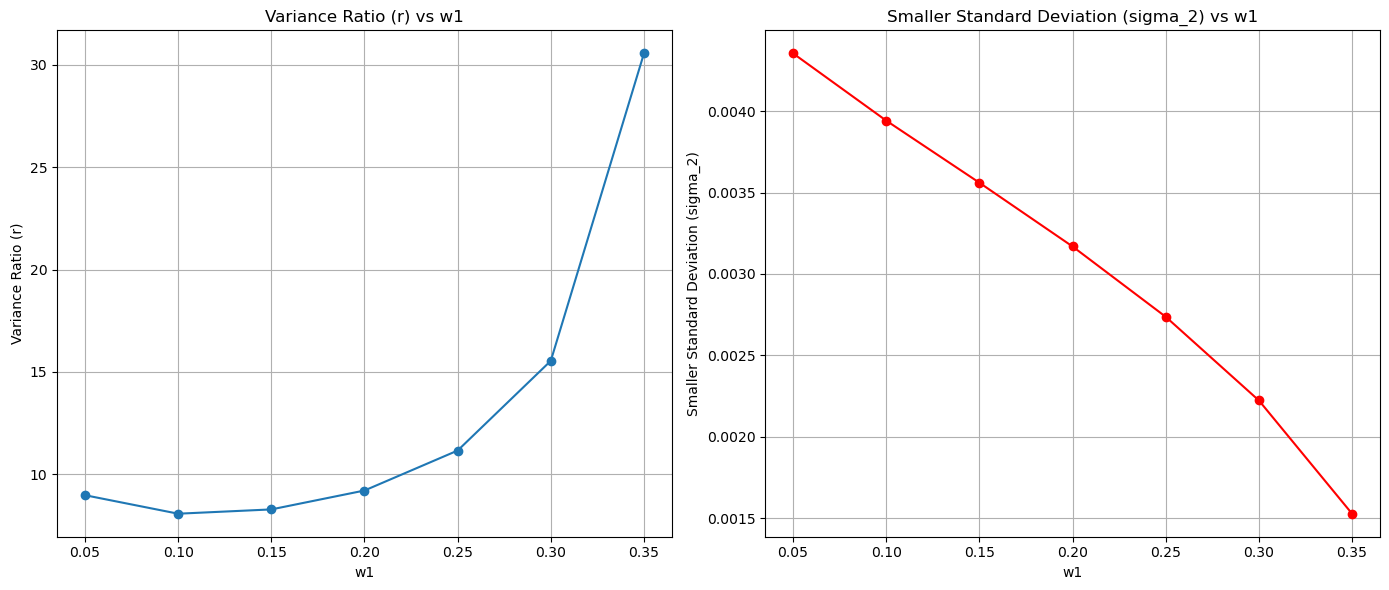

In [6]:
import matplotlib.pyplot as plt

# Plotting the graphs
plt.figure(figsize=(14, 6))

# Plot for r values
plt.subplot(1, 2, 1)
plt.plot(w1_values, r_values_alternative, marker='o')
plt.title('Variance Ratio (r) vs w1')
plt.xlabel('w1')
plt.ylabel('Variance Ratio (r)')
plt.grid(True)

# Plot for sigma_2 values
plt.subplot(1, 2, 2)
plt.plot(w1_values, sigma_2_values_alternative, marker='o', color='red')
plt.title('Smaller Standard Deviation (sigma_2) vs w1')
plt.xlabel('w1')
plt.ylabel('Smaller Standard Deviation (sigma_2)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Problem 4

Draw a P-P plot for the best mixture-of-normals distribution from the previous problem. "Best" means the mixture distribution $F_{w_{m i n}}$ that minimizes $\sum\left(\left(\frac{i}{n+1}\right)-F_{w_{\text {min }}}\left(z_i\right)\right)^2$ over $w_{\text {min }} \in\{.05, .10, \ldots, .35\}$. (Use a stride of 100 in the sum, i.e. sum over $i=1,101,201, \ldots$.) Here $F_w$ denotes the mixture distribution from Problem 3 with weight $w$ on the higher-variance component, and $F_w\left(z_i\right)$ are the $y$ coordinates of the scatter points on the P-P plot for the mixture distribution $F_w$.

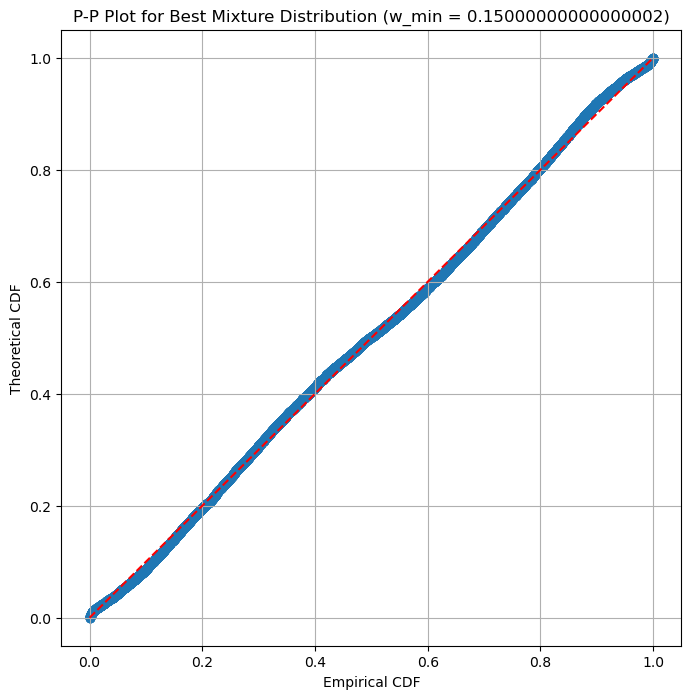

(0.15000000000000002, 0.0035603161831263574, 8.281158585264535)

In [7]:
import pandas as pd
from scipy.stats import norm

# Load the actual log returns data from the provided CSV file
file_path = '/Users/Eric/opt/anaconda3/envs/dsm/log_returns.csv'
log_returns_data = pd.read_csv(file_path)

log_returns_data['log_return'] = portfolio_log_returns
# Assuming the log returns data is in a column named 'log_return'
log_returns = log_returns_data['log_return'].values

# Sort the data and compute the empirical CDF
sorted_log_returns = np.sort(log_returns)
empirical_cdf_log_returns = np.arange(1, len(sorted_log_returns) + 1) / len(sorted_log_returns)

# Now we will find the best weight w_min that minimizes the sum of squared differences
# using the previously defined function and the r and sigma_2 values calculated earlier
sum_squared_diffs_log_returns = {}
for w, r, sigma_2 in zip(np.arange(0.05, 0.36, 0.05), r_values_alternative, sigma_2_values_alternative):
    # Theoretical CDF of the mixture distribution for each data point
    theoretical_cdf = w * norm.cdf(sorted_log_returns, scale=np.sqrt(r) * sigma_2) + \
                      (1 - w) * norm.cdf(sorted_log_returns, scale=sigma_2)
    # Sum of squared differences
    sum_squared_diffs_log_returns[w] = np.sum((empirical_cdf_log_returns - theoretical_cdf) ** 2)

# The best w is the one that minimizes the sum of squared differences
w_min_best_log_returns = min(sum_squared_diffs_log_returns, key=sum_squared_diffs_log_returns.get)
sigma_2_best_log_returns = sigma_2_values_alternative[np.argmin(list(sum_squared_diffs_log_returns.values()))]
r_best_log_returns = r_values_alternative[np.argmin(list(sum_squared_diffs_log_returns.values()))]

# Generate theoretical CDF for the best w
theoretical_cdf_best_log_returns = w_min_best_log_returns * norm.cdf(sorted_log_returns, scale=np.sqrt(r_best_log_returns) * sigma_2_best_log_returns) + \
                                   (1 - w_min_best_log_returns) * norm.cdf(sorted_log_returns, scale=sigma_2_best_log_returns)

# Create P-P plot for the best mixture distribution
plt.figure(figsize=(8, 8))
plt.scatter(empirical_cdf_log_returns, theoretical_cdf_best_log_returns, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--')  # Line y=x for reference
plt.title(f'P-P Plot for Best Mixture Distribution (w_min = {w_min_best_log_returns})')
plt.xlabel('Empirical CDF')
plt.ylabel('Theoretical CDF')
plt.grid(True)
plt.show()

w_min_best_log_returns, sigma_2_best_log_returns, r_best_log_returns  # Output the best parameters